<b>Frontface_crop:</b> Runs a frontal face classifier and identifies faces present in an image.<br>
Crops the face and stores it as a seperate, new image.

Let us import our libraries first: opencv, numpy and matplotlib.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We'll use haarcascades to filter out faces from our raw image. The xml file is collected from opencv's github repository<br>
Let us train our classifier:

In [2]:
frontfacedata="haarcascade_frontalface_alt.xml"
casc_clf=cv2.CascadeClassifier(frontfacedata)

Reading the input image:

Type of image:  <class 'numpy.ndarray'>
Shape:  (233, 216, 3)


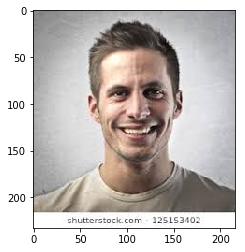

In [4]:
img=cv2.imread('happy.jpeg')

print('Type of image: ',type(img))
print('Shape: ',np.shape(img))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #need to invert colorscheme to account for opencv
plt.show()

Training:

In [6]:
minisize = (img.shape[1],img.shape[0])
miniframe = cv2.resize(img, minisize)

faces = casc_clf.detectMultiScale(miniframe)
            
for f in faces:
    x, y, w, h = [ v for v in f ]
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    sub_face = img[y:y+h, x:x+w]
            
    
    cv2.imwrite('happy_crop.jpeg', sub_face)

Output:

Type of result:  <class 'numpy.ndarray'>
Shape:  (233, 216, 3)


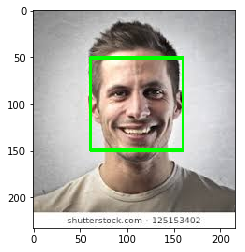

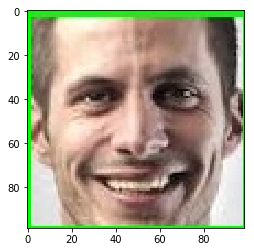

In [7]:
result=cv2.imread('happy_crop.jpeg')

print('Type of result: ',type(result))
print('Shape: ',np.shape(img))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #need to invert colorscheme to account for opencv
plt.show()

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

We will use this method to process batches of images and extract cleaned, facedata from them.